<a href="https://colab.research.google.com/github/vivek16pawar/Netflix-Recomendation-System/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading DataSet
df = pd.read_csv('/content/drive/MyDrive/Module 4/Netflix Recommendation System/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# Getting top rows from dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Getting bottom 5 rows from dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


## Data Cleaning

In [6]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
# Checking total Nan Values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [48]:
#Checking duplicate Values
df.duplicated().sum()

0

In [49]:
# Getting number of unique value
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [52]:
# Shape of data set
df.shape

(7787, 15)

In [53]:
# Dropping rows with nan values
df=df.dropna()
df.shape

(4808, 15)

In [54]:
# Splitting date
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

## Exploratory Data Analysis

In [8]:
# Checking what is in Listed In column of data set
df.listed_in[0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [10]:
# Getting genres from listed in column
genres = pd.Series(", ".join(df.copy().fillna("")['listed_in']).split(", ")).unique().sum()

In [11]:
# Printing types of genres
print(f"There are {len(genres)} unique categorys / genres in this dataset")

There are 608 unique categorys / genres in this dataset


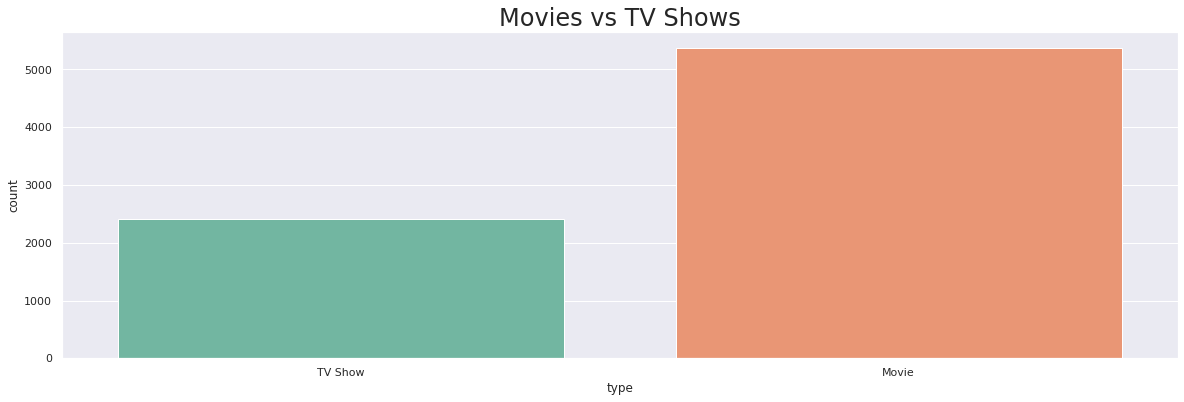

In [12]:
#Analysis of Movies vs TV Shows.
sns.set(style="darkgrid")
plt.figure(figsize=(20,6))
ax = sns.countplot(x="type", data=df, palette="Set2");
ax.set_title( "Movies vs TV Shows" , size = 24 );

In [13]:
# Sorting release year
df.release_year.sort_values(ascending = False)

2327    2021
4468    2021
2753    2021
5103    2021
1355    2021
        ... 
7616    1943
7342    1943
6117    1942
4960    1942
4867    1925
Name: release_year, Length: 7787, dtype: int64

In [14]:
# getting specific year i.e from 2005 to 2021
years = list(range(2005,2021,1)) 

In [15]:
#separate movies and tv_shows:
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

In [16]:
# display top 5 movie rows
movie_rows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [17]:
# display top 5 TV rows
tv_rows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [18]:
#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

In [19]:
# Movie release year and its count
movies_year = movies_counts.reset_index()
movies_year = movies_year.rename({'index': 'Release Year', 'release_year': 'Counts'}, axis=1)  
movies_year.head()

,Release Year,Counts
0,2017,744
1,2018,734
2,2016,642
3,2019,582
4,2020,411


In [20]:
# TV Shows release year and its count
tv_year = tv_counts.reset_index()
tv_year = tv_year.rename({'index': 'Release Year', 'release_year': 'Counts'}, axis=1)  
tv_year.head()

,Release Year,Counts
0,2020,457
1,2019,414
2,2018,387
3,2017,268
4,2016,240


In [21]:
# indexing the movies and tv shows count with years
index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

In [22]:
#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

In [23]:
# setting style for seaborn plots
sns.set(style="darkgrid", palette="muted", color_codes=True)

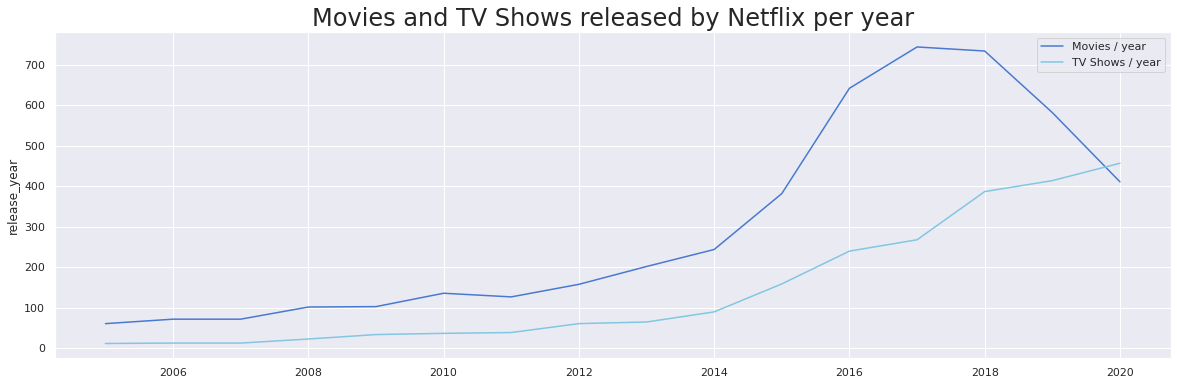

In [24]:
#Line plot of Movies and TV Shows released by Netflix per year")
plt.figure(figsize=(20,6))
ax = sns.lineplot(data=movies, color="b", label="Movies / year")
ax = sns.lineplot(data=tv_shows, color="c", label="TV Shows / year")
ax.set_title( "Movies and TV Shows released by Netflix per year" , size = 24 );

In [25]:
# Calculate percentages of movies and tv shows:
movies_per = round(movie_rows.shape[0] / df["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / df["type"].shape[0] * 100, 2)

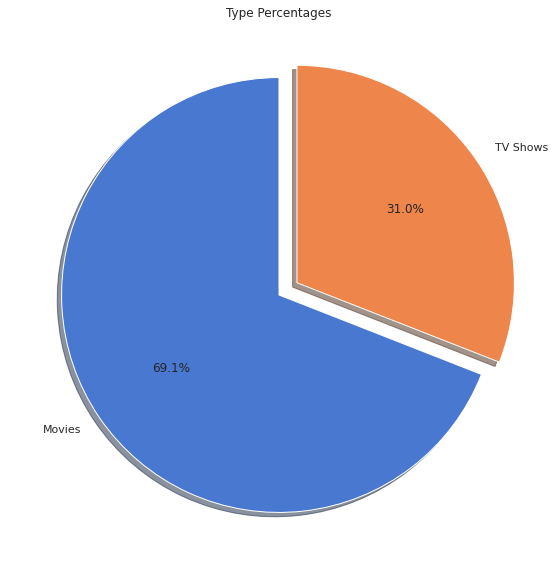

In [26]:
# Pie chart of type percentages
plt.figure(figsize=(10,10))
plt.pie([movies_per, tvshows_per], explode=(0, 0.1,), labels=["Movies", "TV Shows"], autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.title("Type Percentages");

In [27]:
#Top Movie and TV Show producer country:
df.country.fillna('Unknown')
top5_producer_countrys = df.country.value_counts().sort_values(ascending=False).head(10)
top5_producer_countrys

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

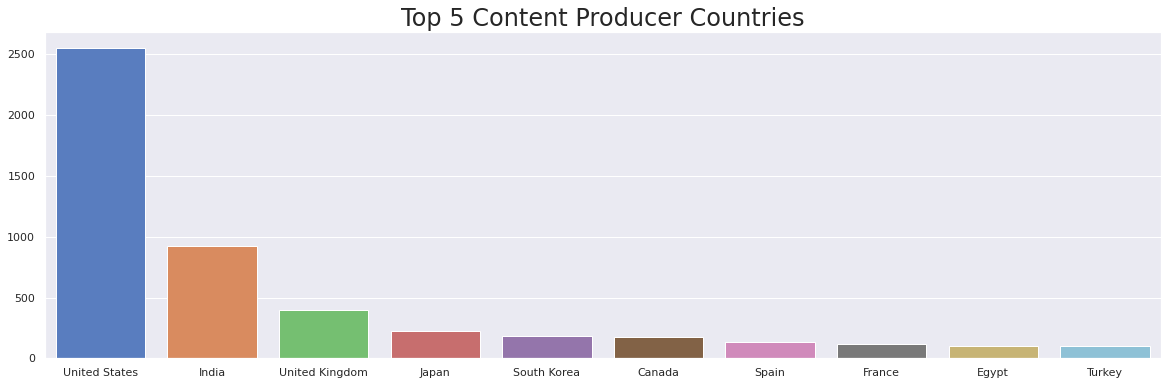

In [28]:
# Bar chart of top 5 Movie / Tv shows producer countrys:
plt.figure(figsize=(20,6));
ax = sns.barplot(top5_producer_countrys.index, top5_producer_countrys.values);
ax.set_title( "Top 5 Content Producer Countries" , size = 24 );

In [29]:
# getting top 5 movie producer countries
top_movie_country = movie_rows['country'].value_counts().sort_values(ascending = False).head()
top_movie_country

United States     1850
India              852
United Kingdom     193
Canada             118
Spain               89
Name: country, dtype: int64

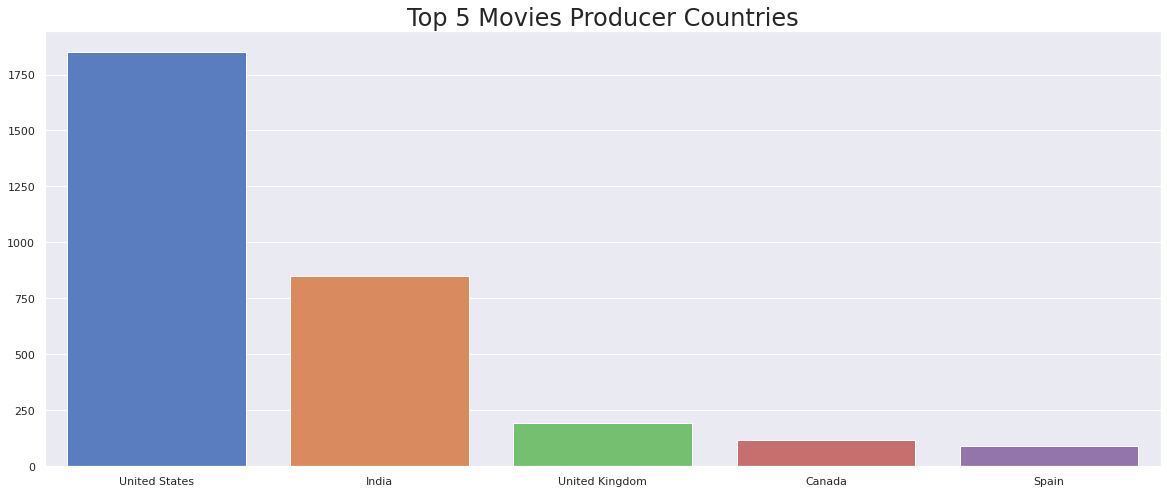

In [30]:
# Bar chart of top 5 Movie producer countrys:
plt.figure(figsize=(20,8));
ax = sns.barplot(top_movie_country.index, top_movie_country.values);
ax.set_title( "Top 5 Movies Producer Countries" , size = 24 );

In [31]:
# getting top 5 TV Show producer countries
top_tvshows_country = tv_rows['country'].value_counts().sort_values(ascending = False).head()
top_tvshows_country

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Name: country, dtype: int64

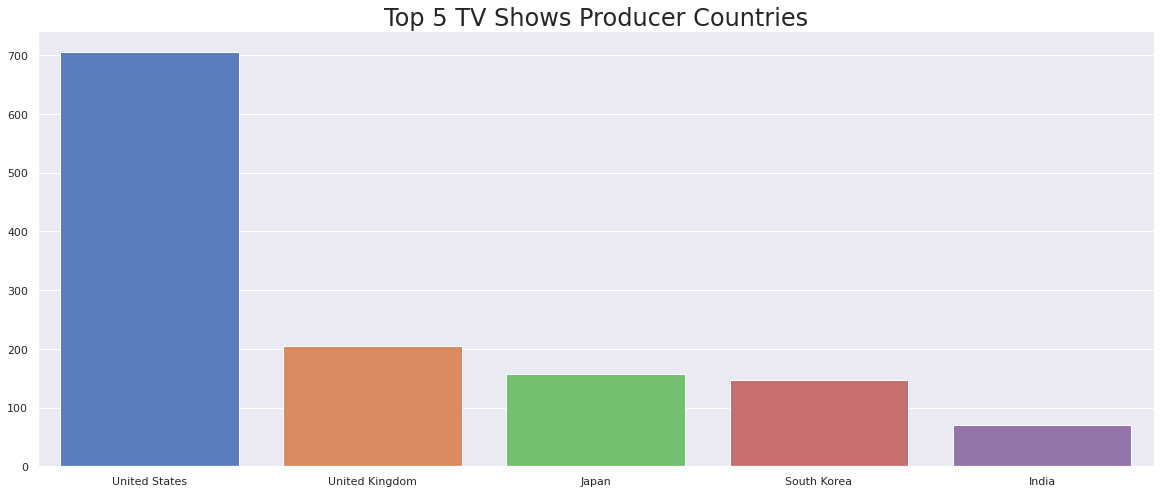

In [32]:
# Bar chart of top 5 Tv Shows producer countrys:
plt.figure(figsize=(20,8));
ax = sns.barplot(top_tvshows_country.index, top_tvshows_country.values);
ax.set_title( "Top 5 TV Shows Producer Countries" , size = 24 );

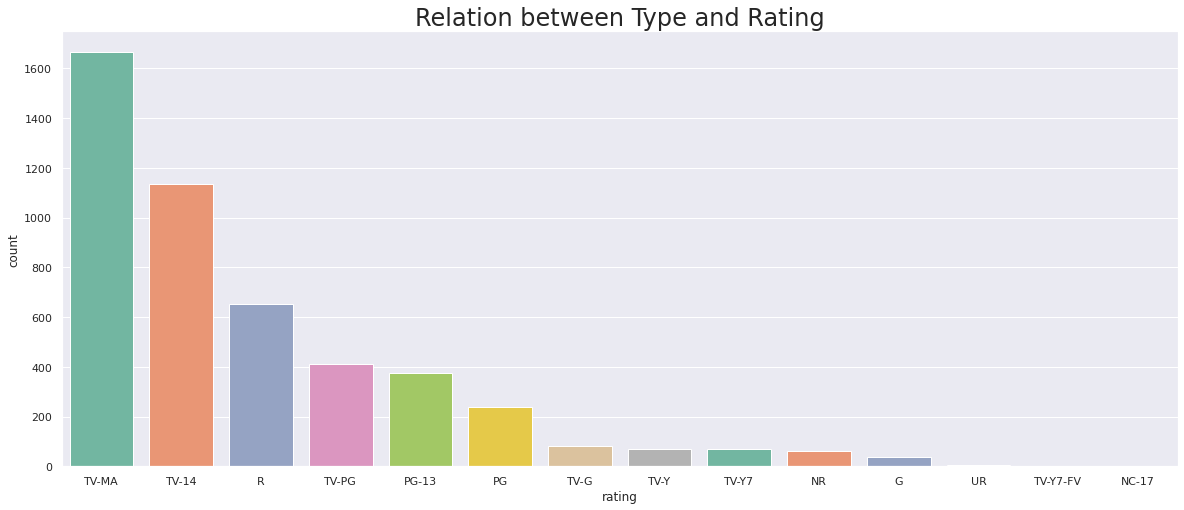

In [62]:
# Rating Count Plot
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])
ax.set_title( "Relation between Type and Rating" , size = 24 );

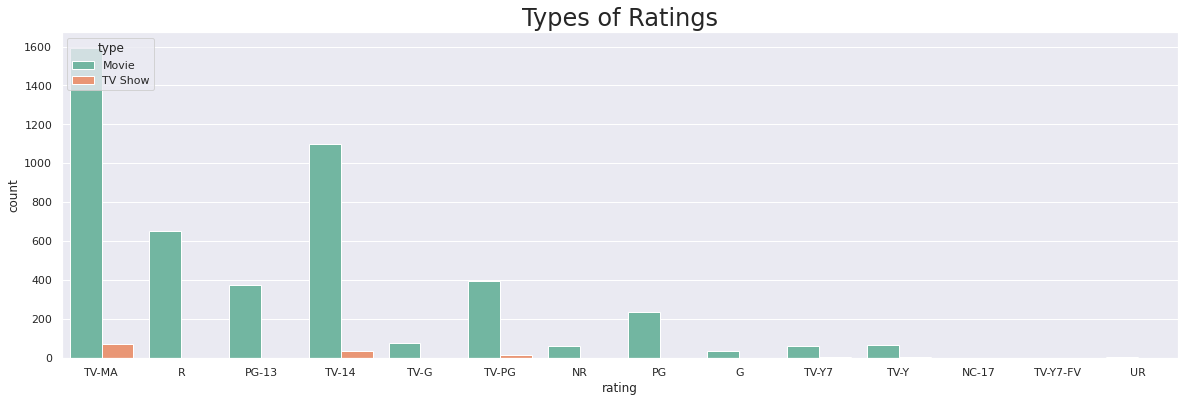

In [63]:
# Plotting graphs for different types of ratings
plt.figure(figsize=(20,6))
ax = sns.countplot(x='rating',hue='type',data=df,palette="Set2")
ax.set_title( "Types of Ratings" , size = 24 );
plt.show()

### Analysis of duration of movies

In [34]:
# Checking the type of duration column content
type(df['duration'][0])

str

In [35]:
# Getting unique values in duration column
df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [36]:
# suppressing the warnings
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [37]:
# replacing min in druration column with space
movie_rows['duration']=movie_rows['duration'].str.replace(' min','');

In [38]:
# Convert data type of moviw rows duration to integer
movie_rows['duration']=movie_rows['duration'].astype(str).astype(int)
movie_rows['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

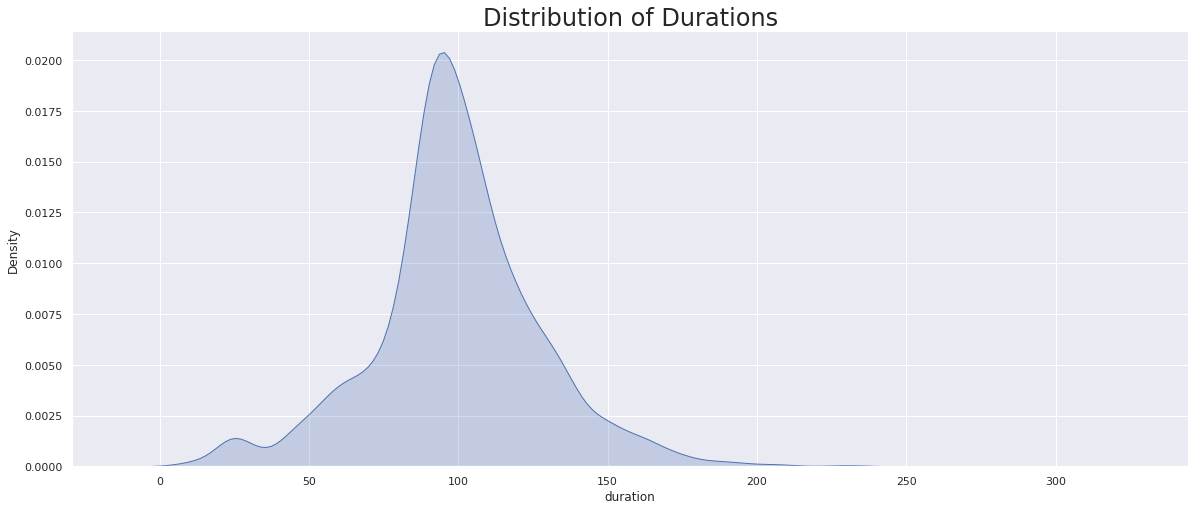

In [39]:
# plotting distribution of durations
sns.set(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.kdeplot(data=movie_rows['duration'], shade=True)
ax.set_title( "Distribution of Durations" , size = 24 );

In [40]:
# getting count of genres from the description column
from collections import Counter

genres=list(df['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)


In [41]:
# Converting genres to dataframe 
genres_df= pd.DataFrame(list(g.items()),columns = ['Genres','Count']) 
genres_df.head()

,Genres,Count
0,InternationalTVShows,1199
1,TVDramas,704
2,TVSci-Fi&Fantasy,76
3,Dramas,2106
4,InternationalMovies,2437


In [42]:
# Plotting the genres count
fig = px.bar(genres_df, x='Genres', y='Count',title="Genres Count")
fig.show()

In [66]:
# Plotting heat map of directors from india
netflix_ind=df[df['country']=='India']
nannef=netflix_ind.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director'],color_continuous_scale='Purples')
fig.show()

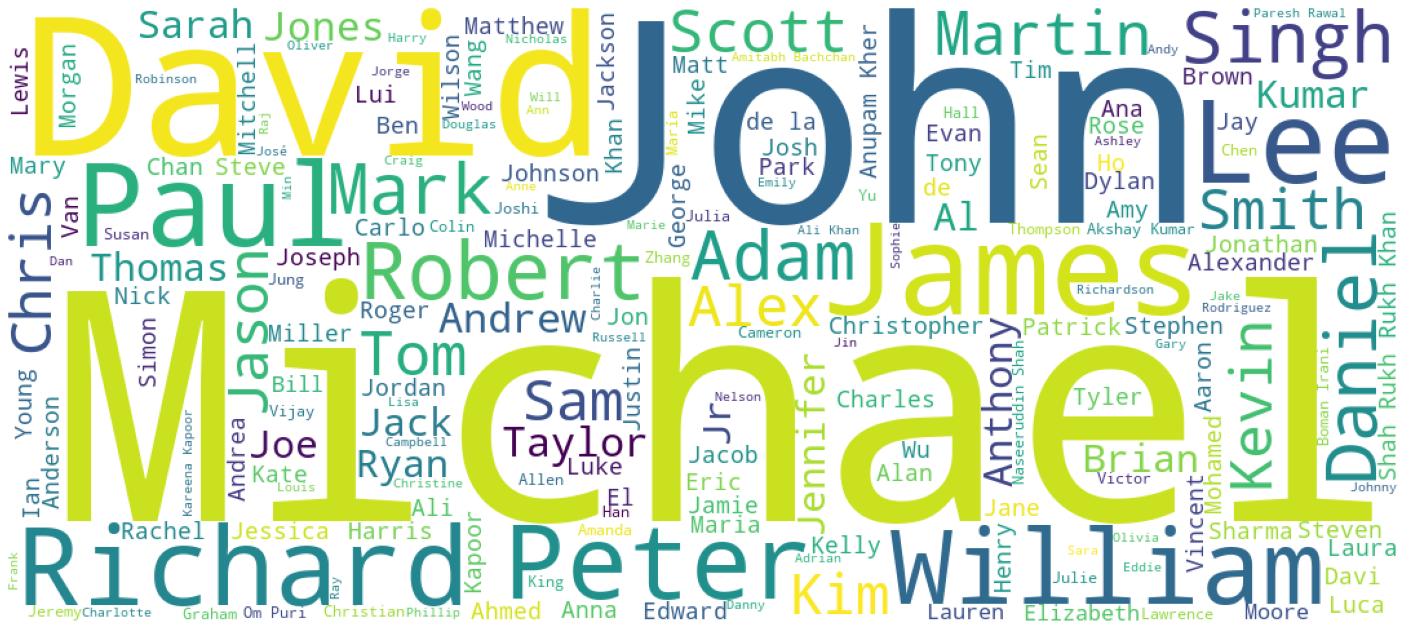

In [70]:
# Text cloud for cast

from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1080,
                          height=480
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

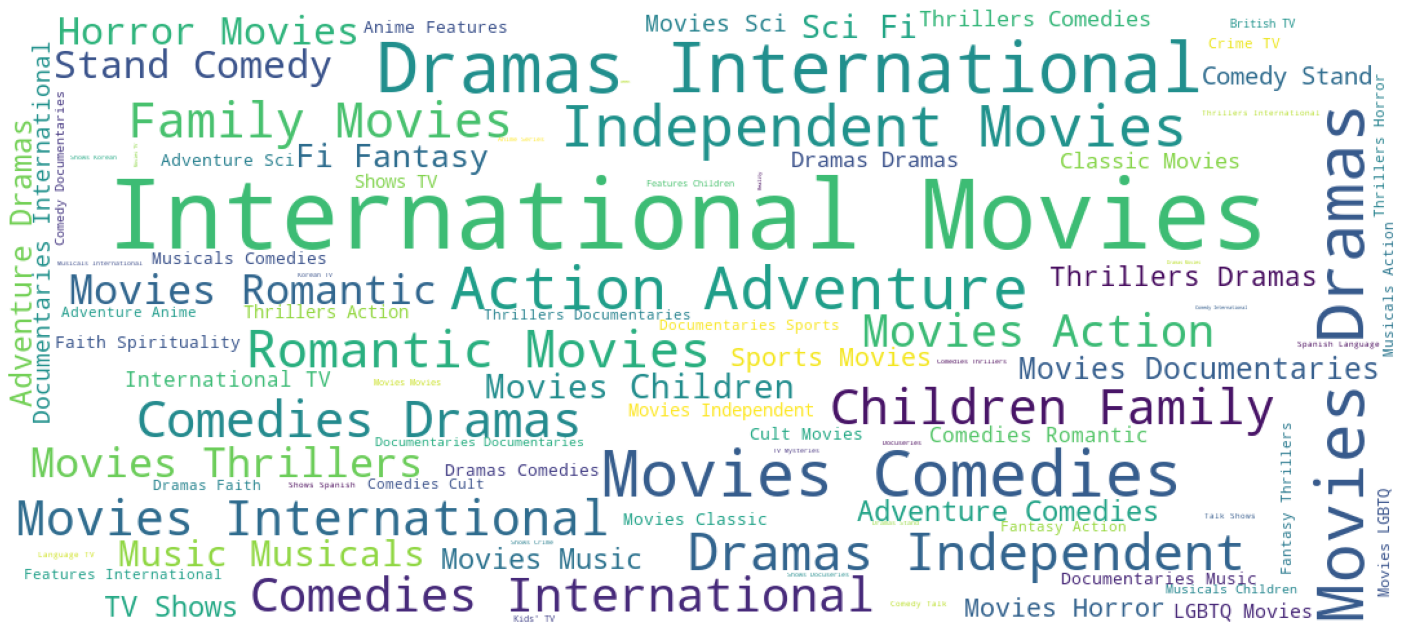

In [71]:
# Text Cloud for Genres/Category

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1080,
                          height=480
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

In [67]:
# Getting new movies and tv show released 
newest_ind_series=netflix_ind.sort_values(by='release_year', ascending=False)[0:10]
newest_ind_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
1410,s1411,Movie,Class of '83,Atul Sabharwal,"Bobby Deol, Bhupendra Jadawat, Hitesh Bhojraj,...",India,2020-08-21,2020,TV-14,98 min,"Dramas, International Movies, Thrillers","Demoted to an academy job, a cop trains five f...",21,2020,8
1827,s1828,Movie,Door Ke Darshan,Gagan Puri,"Dolly Ahluwalia, Manu Rishi Chadha, Mahie Gill...",India,2020-07-25,2020,TV-14,114 min,"Comedies, International Movies","When a matriarch wakes from a 30-year coma, he...",25,2020,7
3119,s3120,TV Show,Jamtara - Sabka Number Ayega,Soumendra Padhi,"Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...",India,2020-01-10,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A group of small-town young men run a lucrativ...,10,2020,1
7429,s7430,Movie,Vir Das: Outside In - The Lockdown Special,Vir Das,Vir Das,India,2020-12-16,2020,TV-MA,50 min,Stand-Up Comedy,Stage banter takes on a different — deeper — m...,16,2020,12
3111,s3112,Movie,Jai Mummy Di,Navjot Gulati,"Poonam Dhillon, Supriya Pathak, Sunny Singh, S...",India,2020-03-14,2020,TV-MA,101 min,"Comedies, International Movies, Romantic Movies",Sick of keeping their love a secret from their...,14,2020,3
7427,s7428,Movie,Vir Das: For India,"Vir Das, Ajay Bhuyan",Vir Das,India,2020-01-26,2020,TV-MA,76 min,Stand-Up Comedy,From the Vedas to Vasco da Gama to vacuous Bol...,26,2020,1
1132,s1133,Movie,Bulbbul,Anvita Dutt,"Tripti Dimri, Avinash Tiwary, Rahul Bose, Para...",India,2020-06-24,2020,TV-MA,94 min,"Horror Movies, International Movies",A child bride grows up to be an enigmatic woma...,24,2020,6
7393,s7394,Movie,Varane Avashyamund,Anoop Sathyan,"Shobana, Suresh Gopi, Dulquer Salmaan, Kalyani...",India,2020-04-20,2020,TV-14,144 min,"Comedies, Dramas, International Movies","At an apartment complex, the lives of a mother...",20,2020,4
2549,s2550,Movie,Guilty,Ruchi Narain,"Kiara Advani, Akansha Ranjan Kapoor, Gurfateh ...",India,2020-03-06,2020,TV-MA,120 min,"Dramas, International Movies",When a college heartthrob is accused of rape b...,6,2020,3
3908,s3909,Movie,Maniyarayile Ashokan,Shamzu Zayba,"Jacob Gregory, S.V. Krishna Shankar, Shine Tom...",India,2020-08-31,2020,TV-14,110 min,"Comedies, International Movies, Romantic Movies",When his unlucky horoscope doesn’t bode well f...,31,2020,8
